In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("final_no_pct.csv").iloc[:,1:]

In [4]:
defense = data.drop(columns=data.columns[11:42])

In [223]:
defense.head()

,Tm,Playoff_Result,Year,Games_Played,W,L,PF,PA,PD,MoV,...,D_EXP,D_3DAtt,D_3DConv,D_3D%,D_4DAtt,D_4DConv,D_4D%,D_RZAtt,D_RZTD,D_RZPct
0,Green Bay Packers,5,2010,16.0,10,6,388,240,148,9.3,...,199.39,213.0,77.0,0.362,20.0,6.0,0.300,31.0,15.0,0.484
1,Pittsburgh Steelers,4,2010,16.0,12,4,375,232,143,8.9,...,216.30,209.0,70.0,0.335,16.0,10.0,0.625,40.0,16.0,0.400
2,Chicago Bears,3,2010,16.0,11,5,334,286,48,3.0,...,168.17,216.0,75.0,0.347,13.0,6.0,0.462,42.0,20.0,0.476
3,New York Jets,3,2010,16.0,11,5,367,304,63,3.9,...,182.51,219.0,81.0,0.370,6.0,4.0,0.667,43.0,26.0,0.605
4,New England Patriots,2,2010,16.0,14,2,518,313,205,12.8,...,71.86,210.0,99.0,0.471,20.0,12.0,0.600,50.0,27.0,0.540


In [5]:
defense["DPen_Yds/Pen"] = defense["DPen_Yds"] / defense["DPen"]

## Ranking

In [6]:
cols = defense.columns[6:]
defense_rank = defense.copy()
defense_rank.iloc[:,6:] = defense.groupby('Year')[cols].rank("min")

In [226]:
defense_rank.head()

,Tm,Playoff_Result,Year,Games_Played,W,L,PF,PA,PD,MoV,...,D_3DAtt,D_3DConv,D_3D%,D_4DAtt,D_4DConv,D_4D%,D_RZAtt,D_RZTD,D_RZPct,DPen_Yds/Pen
0,Green Bay Packers,5,2010,16.0,10,6,8.0,2.0,11.0,11.0,...,7.0,4.0,4.0,9.0,3.0,1.0,1.0,1.0,6.0,1.0
1,Pittsburgh Steelers,4,2010,16.0,12,4,6.0,1.0,10.0,10.0,...,4.0,1.0,1.0,5.0,10.0,10.0,3.0,2.0,1.0,7.0
2,Chicago Bears,3,2010,16.0,11,5,2.0,4.0,4.0,4.0,...,8.0,3.0,3.0,4.0,3.0,6.0,5.0,4.0,5.0,9.0
3,New York Jets,3,2010,16.0,11,5,5.0,6.0,6.0,5.0,...,9.0,8.0,5.0,1.0,1.0,12.0,7.0,8.0,10.0,12.0
4,New England Patriots,2,2010,16.0,14,2,12.0,8.0,12.0,12.0,...,6.0,12.0,12.0,9.0,11.0,9.0,11.0,10.0,8.0,4.0


In [128]:
defense.columns

Index(['Tm', 'Playoff_Result', 'Year', 'Games_Played', 'W', 'L', 'PF', 'PA',
       'PD', 'MoV', 'SoS', 'T_D_Yds', 'D_Ply', 'D_Y/P', 'D_TO', 'D_FL',
       'D_1stD', 'D_Cmp', 'DP_Att', 'DP_Yds', 'DP_TD', 'D_Int', 'D_NY/A',
       'DR_Att', 'DR_Yds', 'DR_TD', 'D_Y/A', 'DPen', 'DPen_Yds', 'DPen_FD',
       'D_Sc%', 'D_TO%', 'D_EXP', 'D_3DAtt', 'D_3DConv', 'D_3D%', 'D_4DAtt',
       'D_4DConv', 'D_4D%', 'D_RZAtt', 'D_RZTD', 'D_RZPct', 'DPen_Yds/Pen',
       'T_D_Yds_Rnk'],
      dtype='object')

C:\Users\matts\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
C:\Users\matts\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\matts\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1

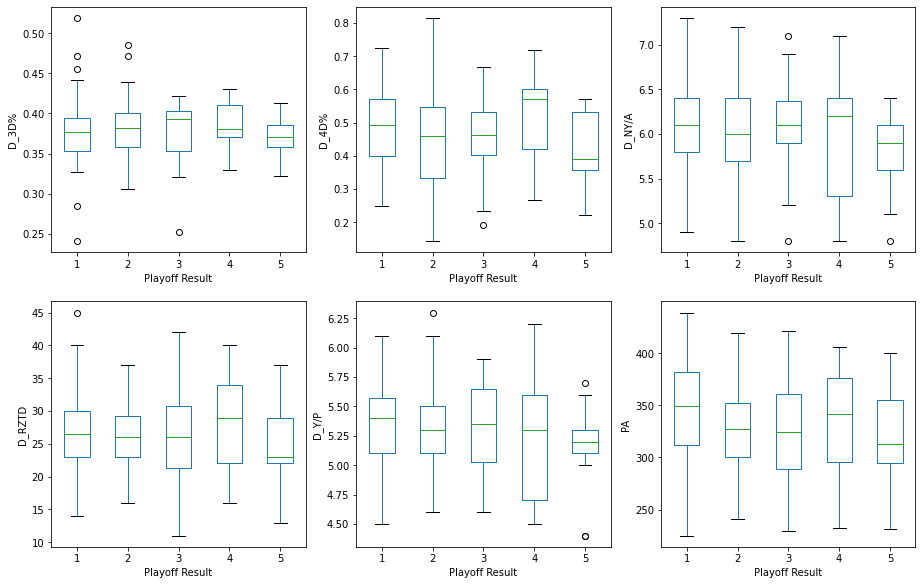

In [53]:
defense_s = ["Playoff_Result","D_3D%", "D_4D%", "D_NY/A", "D_RZTD", "D_Y/P", "PA"]

fig, ax_new = plt.subplots(2,3, sharey=False, figsize=(15,10))
defense[defense_s].boxplot(by="Playoff_Result", ax=ax_new, grid=False)

flat_axes = [ax for axes in ax_new for ax in axes]

for i, ax in enumerate(flat_axes):
    ax.set_xlabel("Playoff Result")
    ax.set_ylabel(defense_s[i+1])
    ax.set_title("")
plt.suptitle("")
plt.show()

C:\Users\matts\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
C:\Users\matts\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
C:\Users\matts\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1

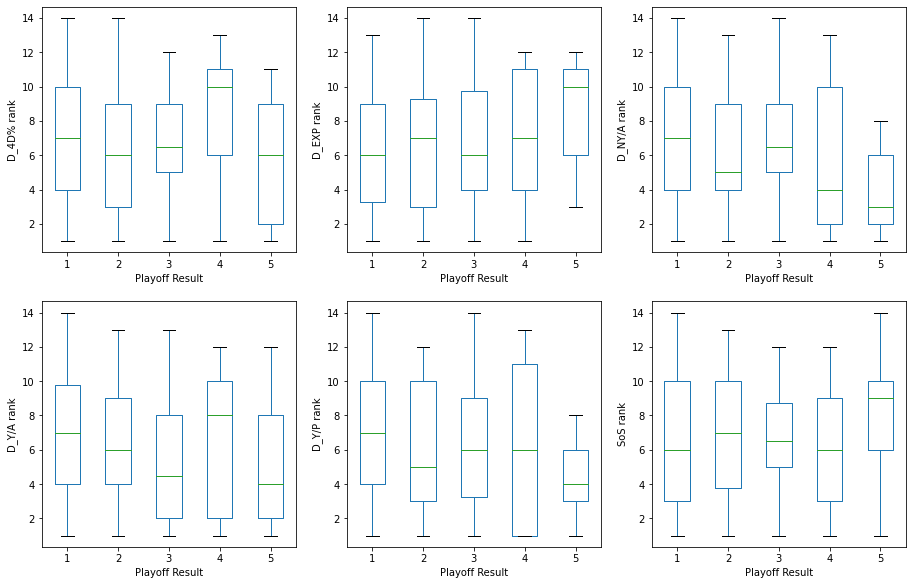

In [57]:
rank_s = ["Playoff_Result", "D_4D%", "D_EXP", "D_NY/A", "D_Y/A", "D_Y/P", "SoS"]

fig, ax_new = plt.subplots(2,3, sharey=False, figsize=(15,10))
defense_rank[rank_s].boxplot(by="Playoff_Result", ax=ax_new, grid=False)

flat_axes = [ax for axes in ax_new for ax in axes]

for i, ax in enumerate(flat_axes):
    ax.set_xlabel("Playoff Result")
    ax.set_ylabel(rank_s[i+1] + " rank")
    ax.set_title("")
plt.suptitle("")
plt.show()

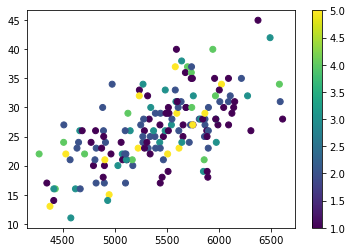

In [219]:
plt.scatter(defense["T_D_Yds"], defense["D_RZTD"], c=defense["Playoff_Result"])
plt.colorbar()
plt.show()

In [7]:
defense.describe()

,Playoff_Result,Year,Games_Played,W,L,PF,PA,PD,MoV,SoS,...,D_3DAtt,D_3DConv,D_3D%,D_4DAtt,D_4DConv,D_4D%,D_RZAtt,D_RZTD,D_RZPct,DPen_Yds/Pen
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2.203704,2016.185185,16.160494,11.086420,5.030864,419.049383,331.91358,87.135802,5.404321,-0.324691,...,210.882716,79.950617,0.379167,19.802469,9.487654,0.470821,47.660494,26.302469,0.549444,8.528937
std,1.236801,3.806210,0.368202,1.605097,1.620608,60.202433,46.74676,67.936992,4.216050,1.453890,...,12.016234,9.184650,0.038019,6.281037,4.212135,0.120805,7.372236,6.037244,0.082005,0.601603
min,1.000000,2010.000000,16.000000,7.000000,1.000000,279.000000,225.00000,-97.000000,-6.100000,-3.900000,...,180.000000,47.000000,0.241000,6.000000,1.000000,0.143000,28.000000,11.000000,0.361000,7.275862
25%,1.000000,2013.000000,16.000000,10.000000,4.000000,378.000000,302.25000,44.250000,2.800000,-1.400000,...,202.000000,75.000000,0.355500,15.000000,6.000000,0.389500,42.000000,22.000000,0.491250,8.156278
50%,2.000000,2016.000000,16.000000,11.000000,5.000000,416.500000,331.00000,89.000000,5.600000,-0.250000,...,211.000000,79.000000,0.381000,19.500000,9.000000,0.463000,48.000000,26.000000,0.550000,8.468513
75%,3.000000,2020.000000,16.000000,12.000000,6.000000,458.000000,367.50000,138.000000,8.600000,0.675000,...,220.000000,86.000000,0.400000,24.000000,12.000000,0.569000,52.750000,30.000000,0.599000,8.913621
max,5.000000,2022.000000,17.000000,15.000000,9.000000,606.000000,439.00000,249.000000,15.600000,2.600000,...,238.000000,111.000000,0.519000,35.000000,22.000000,0.815000,65.000000,45.000000,0.814000,10.684211


In [49]:
from sklearn.decomposition import PCA

#X = defense.iloc[:,4:]
X = defense.iloc[:,11:]
#X = data.iloc[:,4:]

pca = PCA(svd_solver = 'full', n_components=2)
pca.fit(X)

PCA(n_components=2, svd_solver='full')

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.78536781, 0.95569283])

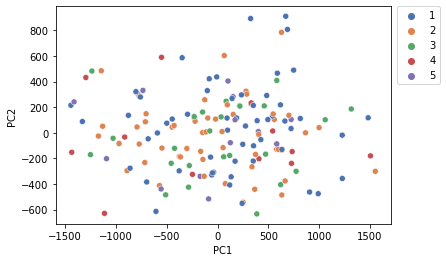

In [51]:
Z = pca.transform(X)

sns.scatterplot(x = Z[:, 0], y = Z[:, 1], hue= defense['Playoff_Result'], palette="deep")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

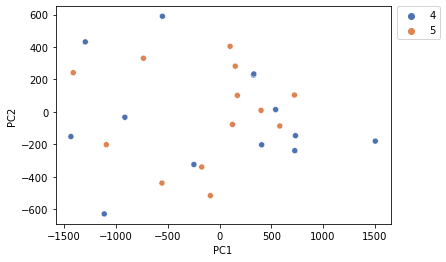

In [52]:
champs = defense['Playoff_Result'] > 3

sns.scatterplot(x = Z[champs, 0], y = Z[champs, 1], hue= defense.loc[champs]['Playoff_Result'], palette="deep")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

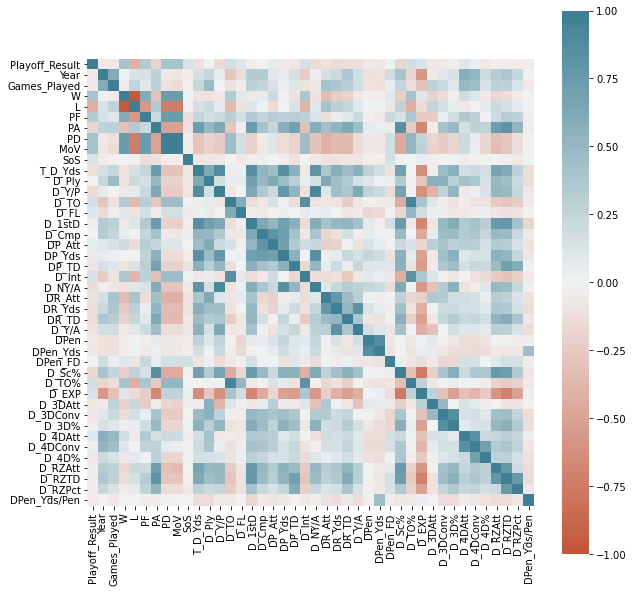

In [59]:
corr = defense.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

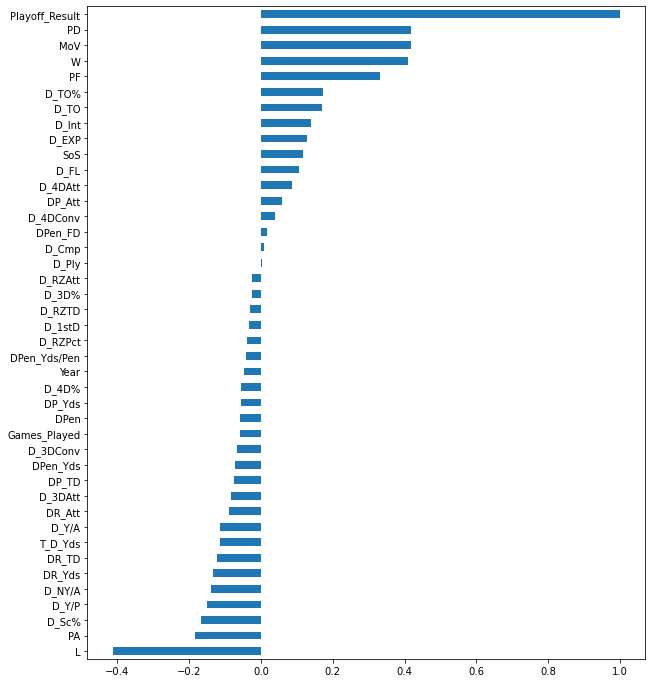

In [60]:
plt.figure(figsize=(10,12))
corr["Playoff_Result"].sort_values(ascending = True).plot.barh()
plt.xlabel

Stats: D_Y/P, D_NY/A, D_3D%, D_4D%, D_TO%, D_RZPct, D_Sc%

Normalized/Ranked: D_EXP, D_Y/A, D_Y/P, D_NY/A, D_4D%